In [5]:
!pip3 install optuna

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fbae3376438>: Failed to establish a new connection: [Errno -2] Name or service not known')': /simple/optuna/
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fbae33762b0>: Failed to establish a new connection: [Errno -2] Name or service not known')': /simple/optuna/
  Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fbae3376400>: Failed to establish a new connection: [Errno -2] Name or service not known')': /simple/optuna/
  Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewCon

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
!pip3 install xgboost

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f820318d438>: Failed to establish a new connection: [Errno -2] Name or service not known')': /simple/xgboost/
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f820318d0b8>: Failed to establish a new connection: [Errno -2] Name or service not known')': /simple/xgboost/
  Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f820318d278>: Failed to establish a new connection: [Errno -2] Name or service not known')': /simple/xgboost/
  Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'New

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import xgboost
#import optuna

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold


import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm




ModuleNotFoundError: No module named 'xgboost'

# data processing

### Apload the data set

In [1]:
path='./drive/My Drive/Zindi_mentorship'

train=pd.read_csv("/Train_v2.csv")
test=pd.read_csv("/Test_v2.csv")

NameError: name 'pd' is not defined

In [6]:
id=test['uniqueid']

In [7]:
train['year_'] = train['year']
test['year_'] = test['year']
float_array = train[['household_size', 'age_of_respondent', 'year_']].values.astype(float)
float_array = test[['household_size', 'age_of_respondent', 'year_']].values.astype(float)

In [8]:
print(train.shape,test.shape)

(23524, 14) (10086, 13)


In [9]:
train_data=train

In [10]:
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,year_
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,2018
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,2018
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,2018
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,2018
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income,2018
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income,2018
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income,2018
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed,2018


In [10]:
country=test['country']

In [11]:
## Let us have a look at the features of our dataset

In [12]:
print(train_data.shape,test.shape)

(23524, 14) (10086, 13)


In [13]:
train_data.describe()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
 13  year_                   23524 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 2.5+ MB


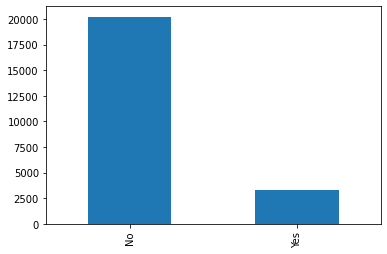

In [14]:
train_data.bank_account.value_counts().plot(kind='bar')

In [15]:
train_data.bank_account.value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

In [16]:
scale_pos_weight = 20212/3312


In [17]:
scale_pos_weight

6.102657004830918

### Convert the target data set to binary variable 0,1

In [18]:
train_data['bank_account']=np.where(train_data['bank_account']=='Yes',1,0)

### convert the categorical variables

### education

In [19]:
train_data['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [20]:
#train_data['education_level'] = train_data['education_level'].replace(['Secondary education','Vocational/Specialised training','Tertiary education'], 'high')
#test['education_level'] = test['education_level'].replace(['Secondary education','Vocational/Specialised training','Tertiary education'], 'high')


In [21]:
train_data.head(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,year_
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,2018
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,2018
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,2018
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,2018
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,2018


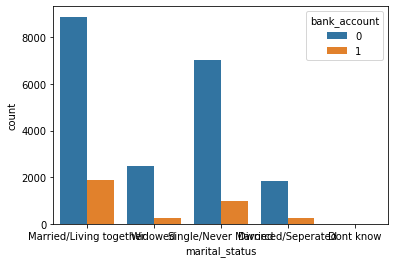

In [22]:
sns.countplot(train_data['marital_status'], hue=train_data['bank_account'])

In [23]:

train['country_'] = train['country']
test['country_'] = test['country']
le= LabelEncoder()
categ = ['relationship_with_head', 'marital_status', 'education_level', 'job_type', 'country_']
# One Hot Encoding conversion
train_data = pd.get_dummies(train_data, prefix_sep='_', columns = categ)

test= pd.get_dummies(test, prefix_sep='_', columns = categ)

# Labelncoder conversion
train_data['location_type'] = le.fit_transform(train_data['location_type'])
train_data['cellphone_access'] = le.fit_transform(train_data['cellphone_access'])
train_data['gender_of_respondent'] = le.fit_transform(train_data['gender_of_respondent'])


test['location_type'] = le.fit_transform(test['location_type'])
test['cellphone_access'] = le.fit_transform(test['cellphone_access'])
test['gender_of_respondent'] = le.fit_transform(test['gender_of_respondent'])


train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,2018,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,2018,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,2018,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,Kenya,2018,uniqueid_4,0,0,1,5,34,0,2018,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,Kenya,2018,uniqueid_5,0,1,0,8,26,1,2018,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [24]:
train_data=train_data.drop(["uniqueid", "country","year", ], axis=1)
test=test.drop(["country","year"], axis=1)

In [25]:
from sklearn.model_selection import train_test_split

X = train_data.drop('bank_account', axis=1)
y = train_data['bank_account']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
train_data.shape

(23524, 38)

In [27]:
test_data = test.drop('uniqueid', axis=1)


In [43]:
model_logit=LogisticRegression(C=10.0, fit_intercept=True, intercept_scaling=1, max_iter=100,n_jobs=3,solver='lbfgs')

In [44]:
# ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’

In [45]:
model_logit.fit(X_train, y_train)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=3, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:

pred=model_logit.predict(X_test)

In [47]:
1-accuracy_score(y_test,pred)

0.11448002266931145

## gridsearch for logistic regression

In [30]:
fold = KFold(n_splits=5, shuffle=True, random_state=777)

In [31]:
 grid = {
        'C':  [10,15,20,25, 30]
         , 'solver': ['newton-cg'],
         'max_iter':[10,100,200,1000]
    }
clf = LogisticRegression(penalty='l2', random_state=777, max_iter=100, tol=10)
gs = GridSearchCV(clf, grid, scoring='roc_auc', cv=fold)
gs.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/optim

GridSearchCV(cv=KFold(n_splits=5, random_state=777, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=777, solver='lbfgs',
                                          tol=10, verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [10, 15, 20, 25, 30],
                         'max_iter': [10, 100, 200, 1000],
                         'solver': ['newton-cg']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [32]:
gs.best_params_

{'C': 20, 'max_iter': 100, 'solver': 'newton-cg'}

In [ ]:
test_pred=model0.predict(test_data)

### make a prediction

In [ ]:
col=[id[i] +' '+'x'+' '+ country[i] for i in range(len(test))]

test['bank_account']=test_pred
test['uniqueid']=col
parameters that

pred=test[['uniqueid','bank_account']]
parameters that
# pred.columns
pred.to_csv('prediction_11.csv', index=False)


## using svm

In [ ]:
clf = svm.SVC(kernel='rbf',C=100,)
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
print(1-accuracy_score(y_test,pred))

/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.12312269764805894


In [ ]:
clf2 = svm.SVC(kernel='linear',C=100,)
clf2.fit(X_train, y_train)
predc=clf2.predict(X_test)
print(1-accuracy_score(y_test,pred))

0.11490507225843016


## using random forest

In [93]:

# Create the model with 100 trees
model_randf = RandomForestClassifier(bootstrap= True,
                                max_depth= 47,
                                max_features= 'auto',
                                min_samples_leaf= 4,
                                min_samples_split= 5,
                                n_estimators= 733)
# Fit on training data

In [95]:
model_randf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=47, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=733,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
pred = model_randf.predict(X_test)
# Probabilities for each class
print(1-accuracy_score(y_test,pred))

0.1113629923491074


## Gridsearch for random forest

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4,6]
bootstrap = [True, False]

In [ ]:

model_rf =  RandomForestClassifier()

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rf_random = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 45.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4, 6], 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 15, 26, 36, 47, 57, 68, 78, 89, 99, 110, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 47,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 733}

In [ ]:
1-accuracy_score(y_test,pred)

0.11547180504392174



## using xgboost
In this part, we try to experiment the xgboost classifier with gridsearch to find the best parameters

In [ ]:

model = XGBClassifier()

param_grid = {'min_child_weight': [2, 3,4,5],
        'gamma': [0.5,0.8,0.9, 1, 1.5],
        'subsample': [0.6,0.7, 0.8,0.9],
        'max_depth': [2,5,10,15],
        'max_delta_step':[0, 1, 2,4],
        'lambda':[1,1.5,2],
        'alpha':[0,1,1.5],
        'lr':[0.01,0.05,0.07, 0.1],
        'cv':[4,5,6]

        }
model2 = GridSearchCV(model, param_grid)
model2.fit(X_train, y_train)
print(model2.best_params_)

In [ ]:
[I 2020-07-16 20:55:19,416] Finished trial#228 with value: 0.8921790875602154 with parameters: {'min_child_weight': 4, 'gamma': 1.7343571874110282, 'subsample': 0.8197822151517198, 'colsample_bytree': 0.804480088428881, 'max_deph': 9, 'lr': 0.08535849305738896, 'lambd': 6.850214318645396, 'alpha': 3.827093200443012, 'scale_pos_weight': 1}. Best is trial#154 with value: 0.8931708699348258.


In [129]:

# fit and Evaluate model[I 2020-07-16 20:55:19,416] Finished trial#228 with value: 0.8921790875602154 with parameters: {'min_child_weight': 4, 'gamma': 1.7343571874110282, 'subsample': 0.8197822151517198, 'colsample_bytree': 0.804480088428881, 'max_deph': 9, 'lr': 0.08535849305738896, 'lambd': 6.850214318645396, 'alpha': 3.827093200443012, 'scale_pos_weight': 1}. Best is trial#154 with value: 0.8931708699348258.

xgb_model= XGBClassifier(min_child_weight = 4, gamma = 1.7343571874110282, subsample = 0.8197822151517198,
                         colsample_bytree = 0.7355311514104833,
                         max_depth = 9,
                         learning_rate= 0.08535849305738896,
                         reg_lambda= 6.850214318645396,
                         reg_alpha=3.827093200443012,
                         scale_pos_weight= 1,
                         nthread=4,
                         seed=27,
                         n_jobs=3)
#xgb_model= XGBClassifier(**model2.best_params)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("Error rate of Random Forest classifier: ", 1 - accuracy_score(y_test, y_pred))
confusion_matrix(y_pred, y_test)

Error rate of Random Forest classifier:  0.10838764522527633


array([[5930,  622],
       [ 143,  363]])

In [120]:
pred=xgb_model.predict(test_data)

In [130]:
col=[id[i] +' '+'x'+' '+ country[i] for i in range(len(test))]

test['bank_account']=pred
test['uniqueid']=col


pred=test[['uniqueid','bank_account']]

# pred.columns
pred.to_csv('xgboost_to_try.csv', index=False)


In [115]:
def objective(trial):
    min_child_weight = trial.suggest_int('min_child_weight', 2, 10)
    gamma=trial.suggest_float('gamma',0.5,10)
    subsample = trial.suggest_float('subsample', 0.5,1)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0,1)
    max_deph = trial.suggest_int('max_deph', 2,10)
    lr= trial.suggest_float('lr', 0.001,0.1)
    lambd= trial.suggest_float('lambd', 1,10)
    alpha= trial.suggest_float('alpha', 0,10)
    scale_pos_weight = trial.suggest_int('scale_pos_weight', 0.01,6.102657004830918)

    
    
    my_model3 = XGBClassifier(learning_rate=lr,min_child_weight =min_child_weight, gamma = gamma, subsample = subsample, colsample_bytree = colsample_bytree,
                              max_depth = max_deph,reg_alpha=alpha, reg_lambda=lambd, scale_pos_weight=scale_pos_weight)

   
    my_model3.fit(X_train, y_train)
    y_pred = my_model3.predict(X_test)
    
    return accuracy_score(y_test, my_model3.predict(X_test))


# cross_validate(X_train_mat100, y,lamda=0.01,k=4)parameters thatparameters that

sampler = optuna.samplers.TPESampler()
study = optuna.create_study(sampler=sampler, direction='maximize')
df = study.optimize(func=objective, n_trials=500,show_progress_bar=True)

/usr/local/lib/python3.6/dist-packages/optuna/_experimental.py:61: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



/usr/local/lib/python3.6/dist-packages/optuna/distributions.py:544: UserWarning:

The distribution is specified by [0.01, 6.102657004830918] and step=1, but the range is not divisible by `step`. It will be replaced by [0.01, 6.01].



[I 2020-07-16 20:39:51,112] Finished trial#0 with value: 0.8859450269198074 with parameters: {'min_child_weight': 6, 'gamma': 3.6790197500428774, 'subsample': 0.8442864256419206, 'colsample_bytree': 0.7903849837986854, 'max_deph': 5, 'lr': 0.009460043107251632, 'lambd': 9.350440969763708, 'alpha': 7.653251779628442, 'scale_pos_weight': 1}. Best is trial#0 with value: 0.8859450269198074.
[I 2020-07-16 20:39:54,087] Finished trial#1 with value: 0.8209124397846416 with parameters: {'min_child_weight': 10, 'gamma': 5.003231278789737, 'subsample': 0.7021254507773351, 'colsample_bytree': 0.4574728297993279, 'max_deph': 7, 'lr': 0.0521312982277301, 'lambd': 7.141942892000751, 'alpha': 5.306630723059939, 'scale_pos_weight': 5}. Best is trial#0 with value: 0.8859450269198074.
[I 2020-07-16 20:39:56,224] Finished trial#2 with value: 0.7910172853499575 with parameters: {'min_child_weight': 3, 'gamma': 6.102333525443569, 'subsample': 0.9151742183087719, 'colsample_bytree': 0.36641970687356495, 'ma

In [ ]:
test_pred=xgb_model.predict(test_data)

In [ ]:
col=[id[i] +' '+'x'+' '+ country[i] for i in range(len(test))]

test['bank_account']=test_pred
test['uniqueid']=col


pred=test[['uniqueid','bank_account']]

# pred.columns
pred.to_csv('xgboost_overfit.csv', index=False)


In [ ]:
#y_pred = clf.predict(X_test)


In [ ]:
#1-accuracy_score(y_test,pred)

0.1113629923491074

In [ ]:
using LightGBM

In [123]:
def objective(trial):
    #min_child_weight = trial.suggest_int('min_child_weight', 2, 10)
    #gamma=trial.suggest_float('gamma',0.5,10)
    subsample = trial.suggest_float('subsample', 0.1,1)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0,1)
    # max_deph = trial.suggest_int('max_deph', 2,10)
    lr= trial.suggest_float('lr', 0.001,0.1)
    lambd= trial.suggest_float('lambd', 1,10)
    alpha= trial.suggest_float('alpha', 0,10)
    n_estimators=trial.suggest_int('n_estimator', 5,1000)
    num_leaves= trial.suggest_int('num_leaves', 2,10)


    
    
    my_lgm = lgb.LGBMClassifier(learning_rate=lr, subsample = subsample, colsample_bytree = colsample_bytree,reg_alpha=alpha, 
                                   reg_lambda=lambd, num_leaves=num_leaves, n_estimators=n_estimators, boosting_type= 'gbdt',random_state= 42)

   
    my_lgm.fit(X_train, y_train)
    y_pred = my_lgm .predict(X_test)
    
    return accuracy_score(y_test, my_lgm.predict(X_test))


# cross_validate(X_train_mat100, y,lamda=0.01,k=4)parameters thatparameters that

sampler = optuna.samplers.TPESampler()
study = optuna.create_study(sampler=sampler, direction='maximize')
df = study.optimize(func=objective, n_trials=500,show_progress_bar=True)

/usr/local/lib/python3.6/dist-packages/optuna/_experimental.py:61: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



[I 2020-07-16 21:30:06,500] Finished trial#0 with value: 0.8604420515726835 with parameters: {'subsample': 0.42954070655905596, 'colsample_bytree': 0.016036340086735823, 'lr': 0.003644444874729804, 'lambd': 1.0597220911365415, 'alpha': 1.074290672861865, 'n_estimator': 659, 'num_leaves': 4}. Best is trial#0 with value: 0.8604420515726835.
[I 2020-07-16 21:30:06,893] Finished trial#1 with value: 0.8604420515726835 with parameters: {'subsample': 0.12259680026168257, 'colsample_bytree': 0.4922175864966365, 'lr': 0.009498781973111773, 'lambd': 5.994248153785465, 'alpha': 5.798744354373331, 'n_estimator': 214, 'num_leaves': 2}. Best is trial#0 with value: 0.8604420515726835.
[I 2020-07-16 21:30:07,077] Finished trial#2 with value: 0.8604420515726835 with parameters: {'subsample': 0.9811460984468312, 'colsample_bytree': 0.9694514750969659, 'lr': 0.020943888215146745, 'lambd': 5.634681527681043, 'alpha': 2.810412678219051, 'n_estimator': 11, 'num_leaves': 4}. Best is trial#0 with value: 0.860

In [125]:
# params = {'boosting_type': 'gbdt',
#           'max_depth' : -1,
#           'objective': 'binary',
#           'nthread': 3, # Updated from nthread
#           'num_leaves': 64,
#           'learning_rate': 0.05,
#           'max_bin': 512,
#           'subsample_for_bin': 200,
#           'subsample': 1,
#           'subsample_freq': 1,
#           'colsample_bytree': 0.8,
#           'reg_alpha': 5,
#           'reg_lambda': 10,
#           'min_split_gain': 0.5,
#           'min_child_weight': 1,
#           'min_child_samples': 5,
#           'scale_pos_weight': 1,
#           'num_class' : 1,
#           'metric' : 'binary_error'}

params={'boosting_type': 'gbdt',
 'colsample_bytree': 0.23568434745552325,
 'learning_rate':  0.09042049414606464,
 'n_estimators': 915,
 'num_leaves': 10,
 'objective': 'binary',
 'random_state': 42,
 'reg_alpha':0.24060508712715062,
 'reg_lambda':  6.693537423020425,
 'subsample':  0.18629885058277373}



In [126]:
lgm_model = lgb.LGBMClassifier(**params)

In [127]:
lgm_model.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.23568434745552325, importance_type='split',
               learning_rate=0.09042049414606464, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=915, n_jobs=-1, num_leaves=10, objective='binary',
               random_state=42, reg_alpha=0.24060508712715062,
               reg_lambda=6.693537423020425, silent=True,
               subsample=0.18629885058277373, subsample_for_bin=200000,
               subsample_freq=0)

In [128]:
y_pred=lgm_model.predict(X_test)
1-accuracy_score(y_test,y_pred)

0.1061207140833097

In [86]:
test_pred=lgm_model.predict(test_data)

In [87]:
col=[id[i] +' '+'x'+' '+ country[i] for i in range(len(test))]

test['bank_account']=test_pred
test['uniqueid']=col


pred=test[['uniqueid','bank_account']]

# pred.columns
pred.to_csv('lgbm1.csv', index=False)


In [ ]:


params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 3, # Updated from nthread
          'num_leaves': 64,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 5,
          'reg_lambda': 10,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'}






gridParams = {
    'learning_rate': [0.005, 0.01,0.05,0.07, 0.1],
    'n_estimators': [40, 100,200,1000],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [42,501], # Updated from 'seed'
    'colsample_bytree' : [0.6, 0.65,0.8],
    'subsample' : [0.6,0.7,0.75, 0.8],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

# Create classifier to use. Note that parameters have to be input manually
# not as a dict!
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 3, # Updated from 'nthread'
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])

# To view the default model params:
mdl.get_params().keys()

# Create the grid
grid = GridSearchCV(mdl, gridParams,
                    verbose=0,
                    cv=4,
                    n_jobs=2)
# Run the grid
grid.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_bin=512,
        max_depth=-1, min_child_samples=5, min_child_weight=1,
        min_split_gain=0.5, n_estimators=100, n_jobs=3, num_leaves=31,
        objective='binary', random_state=None, reg_alpha=0.0,
        reg_lambda=0.0, scale_pos_weight=1, silent=True, subsample=1,
        subsample_for_bin=200, subsample_freq=1),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'n_estimators': [40, 100, 200, 1000], 'num_leaves': [6, 8, 12, 16], 'reg_alpha': [1, 1.2], 'random_state': [42, 501], 'colsample_bytree': [0.65, 0.66], 'subsample': [0.7, 0.75, 0.8], 'objective': ['binary'], 'learning_rate': [0.005, 0.01, 0.05, 0.07], 'reg_lambda': [1, 1.2, 1.4], 'boosting_type': ['gbdt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbos

In [ ]:
grid.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.66,
 'learning_rate': 0.07,
 'n_estimators': 1000,
 'num_leaves': 8,
 'objective': 'binary',
 'random_state': 42,
 'reg_alpha': 1.2,
 'reg_lambda': 1.4,
 'subsample': 0.7}

In [ ]:
clf = lgb.LGBMClassifier(boosting_type = 'gbdt',
 colsample_bytree = 0.65,
 learning_rate = 0.005,
 n_estimators = 40,
 num_leaves = 6,
 objective ='binary',
 random_state = 501,
 reg_alpha = 1,
 reg_lambda = 1,
 subsample = 0.7)
clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.65,
        importance_type='split', learning_rate=0.005, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=40, n_jobs=-1, num_leaves=6, objective='binary',
        random_state=501, reg_alpha=1, reg_lambda=1, silent=True,
        subsample=0.7, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred=clf.predict(X_test)

for i in range(len(X_test)):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

In [ ]:

1-accuracy_score(y_test,y_pred)

0.1395579484273165

## Using Grafient Boost

In [ ]:
model_grad = GradientBoostingClassifier(learning_rate=0.01, max_depth=6)


model_grad.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
params = {'max_depth':[2,3,4,5],
          'learning_rate': [0.1,0.5,0.01,0.05], # Updated from nthread
          }

In [ ]:
grid = GridSearchCV(model_grad, params,
                    verbose=0,
                    cv=4,
                    n_jobs=2)
# Run the grid
grid.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'learning_rate': [0.1, 0.5, 0.01, 0.05], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 4}

In [ ]:
y_pred=model_grad.predict(X_test)
1-accuracy_score(y_test,y_pred)

0.11773873618588837

In [ ]:
final_pred=model_grad.predict(test_data)

In [ ]:
col=[id[i] +' '+'x'+' '+ country[i] for i in range(len(test))]

test['bank_account']=final_pred
test['uniqueid']=col


pred=test[['uniqueid','bank_account']]

# pred.columns
pred.to_csv('grad_boost1.csv', index=False)

## ensembling

In [ ]:
!pip install statistics

  Created wheel for statistics: filename=statistics-1.0.3.5-cp27-none-any.whl size=7454 sha256=6922f6fc250275bc6592bcd43a01bf339adc4f8174c0af3a7de878d2bafbbfd9
  Stored in directory: /root/.cache/pip/wheels/75/55/90/73aa7662bfb4565b567618547a275f01372a678ca92ecd64f3
Successfully built statistics


In [98]:
from statistics import mode 

In [100]:
# pred1=model0.predict(X_test)
pred1=xgb_model.predict(X_test)
pred2=model_randf.predict(X_test)
# pred4=model_grad.predict(X_test)
pred3=lgm_model.predict(X_test)




final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred, mode([ pred1[i],pred2[i],pred3[i]]))

In [101]:
1 - accuracy_score(y_test, final_pred)

0.10711249645792009

In [103]:
#pred1=model0.predict(test_data)
pred1=xgb_model.predict(test_data)
pred2=model_randf.predict(test_data)
pred3=lgm_model.predict(test_data)


final_pred = np.array([])
for i in range(0,len(test_data)):
    final_pred = np.append(final_pred, mode([ pred1[i], pred2[i],pred3[i]]))

In [104]:
col=[id[i] +' '+'x'+' '+ country[i] for i in range(len(test))]

test['bank_account']=final_pred
test['uniqueid']=col


pred=test[['uniqueid','bank_account']]

# pred.columns
pred.to_csv('xgb_rf_lgbm1.csv', index=False)